## **Data Visualization**

In [29]:
# Importing essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.io as pio
import kaleido
import textwrap
pio.renderers.default = "notebook"

*Note: Ensure `processed_data.csv` is in the same directory as this notebook before running the code.*

In [30]:
# Loading the preprocessed dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv('processed_data.csv') 

#### Visualizing Compositions

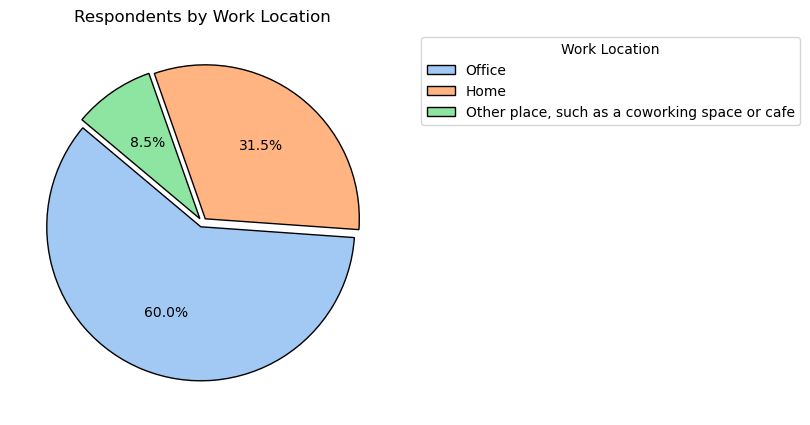

In [31]:
# Counts the occurrences of each work location category
workloc_counts = df['WorkLoc'].value_counts()

# Defines colors and explode effect
colors = sns.color_palette('pastel') 
explode = [0.03] * len(workloc_counts)  

# Creates the pie chart
plt.figure(figsize=(5, 5))
plt.pie(workloc_counts, autopct='%1.1f%%', startangle=140,colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.legend(labels=workloc_counts.index,title='Work Location',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Respondents by Work Location')
plt.show();


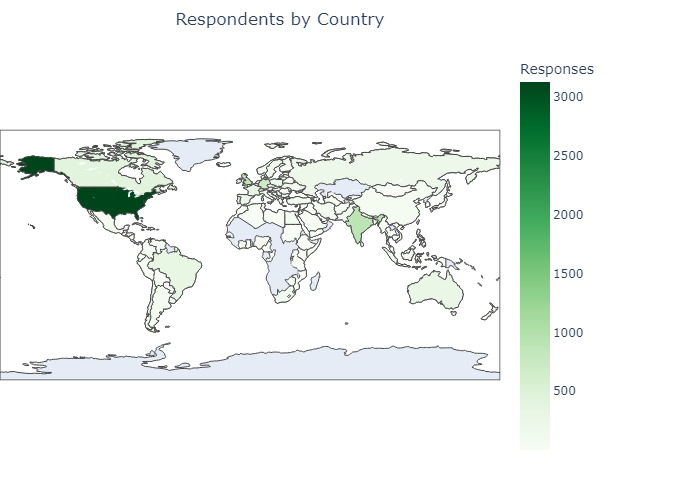

In [32]:
# Counts responses per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Responses']

# Generates the choropleth map
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Responses', 
    title='Respondents by Country',
    color_continuous_scale='Greens'
)
fig.update_layout(
    margin=dict(l=0, r=200, t=50, b=40),  
    title_x=0.4, 
    autosize=True
)
# fig.show()
fig.write_image("treemap.png")  # Save as an image
from IPython.display import display
from PIL import Image
display(Image.open("treemap.png")) #Plot is converted to image to display in github 

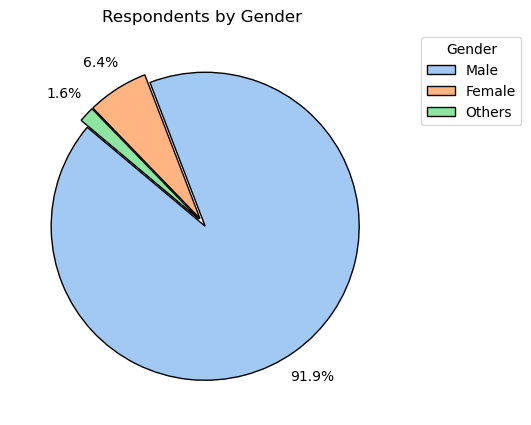

In [33]:
 # Creating a new Gender_Categorized column linked to the original Gender column
df['Gender_Categorized'] = df['Gender']  # Keeps reference to original column

# Categorizing Gender
df['Gender_Categorized'] = np.where(df['Gender_Categorized'] == 'Man', 'Male',
                            np.where(df['Gender_Categorized'] == 'Woman', 'Female', 'Others'))

# Counts the occurrences of each gender category
gender_counts = df['Gender_Categorized'].value_counts()

# Defines colors and explode effect
colors = sns.color_palette('pastel') 
explode = [0.03] * len(gender_counts)  

# Creates the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, autopct='%1.1f%%', pctdistance= 1.2, startangle=140, colors= colors ,explode = explode, wedgeprops={'edgecolor': 'black'})
plt.legend(labels=gender_counts.index,title='Gender',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Respondents by Gender')
plt.show()


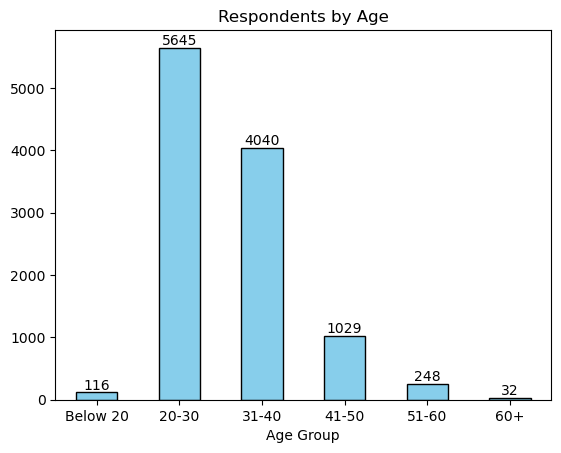

In [34]:
# Binning Age into groups
age_bins = [0, 20, 30, 40, 50, 60, 80]  # Define bin edges
age_labels = ['Below 20', '20-30', '31-40', '41-50', '51-60', '60+']  # Labels for bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count values per Age Group
age_counts = df['Age Group'].value_counts().reindex(age_labels)  # Ensures correct order

# Creates a stacked bar chart
ax = age_counts.plot(kind='bar', edgecolor='black', color='skyblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Respondents by Age')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show();

#### Visualizing Comparisons

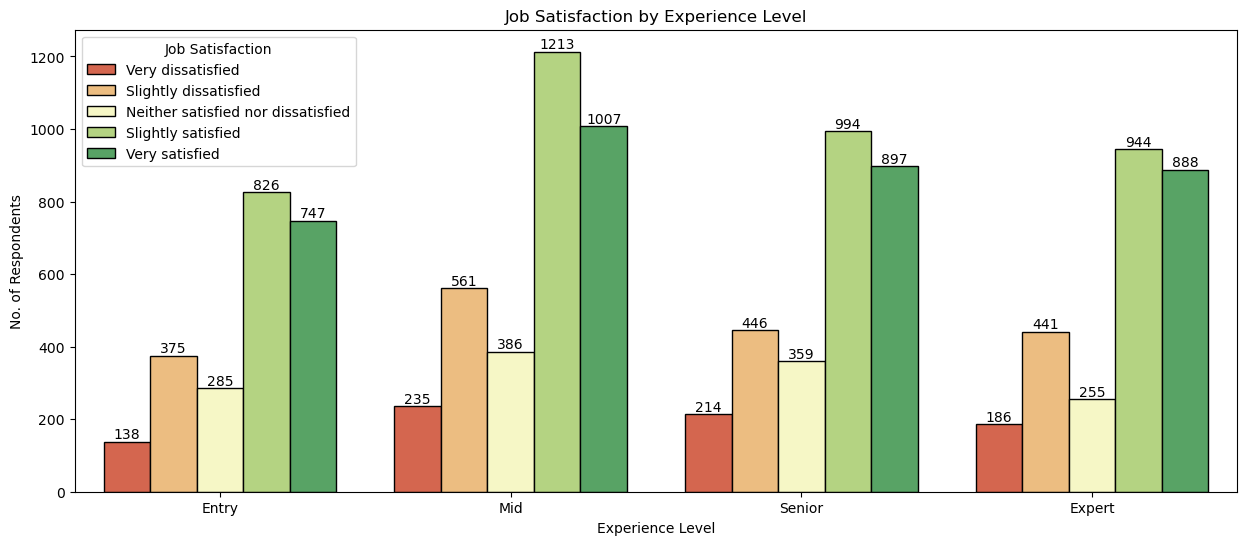

In [35]:
# Defining job satisfaction order for consistent coloring
job_satisfaction_order = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied'
]
#Creates a count bar chart
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Experience_Level', hue='JobSat', data=df, palette='RdYlGn', hue_order=job_satisfaction_order, edgecolor = 'black')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Experience Level')
plt.ylabel('No. of Respondents')
plt.title('Job Satisfaction by Experience Level')
plt.legend(title='Job Satisfaction')
plt.show();

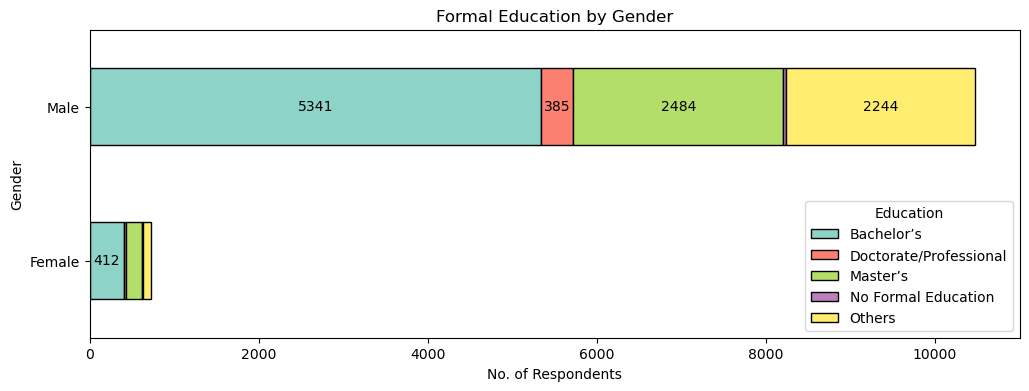

In [36]:
# # Categorizing Gender
df_filtered = df[df['Gender'].isin(['Man', 'Woman'])].copy()
df_filtered['Gender_Categorized'] = np.where(df_filtered['Gender'] == 'Man', 'Male','Female')

# Categorizing Education Level
df_filtered['EdLevel_Categorized'] = np.where(df_filtered['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Bachelor’s',
                             np.where(df_filtered['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Master’s',
                              np.where(df_filtered['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)', 'Doctorate/Professional',
                                np.where(df_filtered['EdLevel'] == 'Professional degree (JD, MD, etc.)', 'Doctorate/Professional', 
                                 np.where(df_filtered['EdLevel'] == 'I never completed any formal education', 'No Formal Education','Others')))))

# Creats a cross-tabulation of Gender vs. EdLevel
gender_edlevel_counts = pd.crosstab(df_filtered['Gender_Categorized'], df_filtered['EdLevel_Categorized'])

# Plots the stacked bar chart 
fig, ax = plt.subplots(figsize=(12, 4))
gender_edlevel_counts.plot(kind='barh', stacked=True,  colormap='Set3', edgecolor='black',ax= ax)
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  
        if width > 300: 
                ax.text( bar.get_x() + bar.get_width() / 2,  bar.get_y() + bar.get_height() / 2,  f"{int(width)}", va="center", ha="center", color="black")
plt.title('Formal Education by Gender')
plt.xlabel('No. of Respondents')
plt.ylabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Education')
plt.show();

#### Current Tech Usage

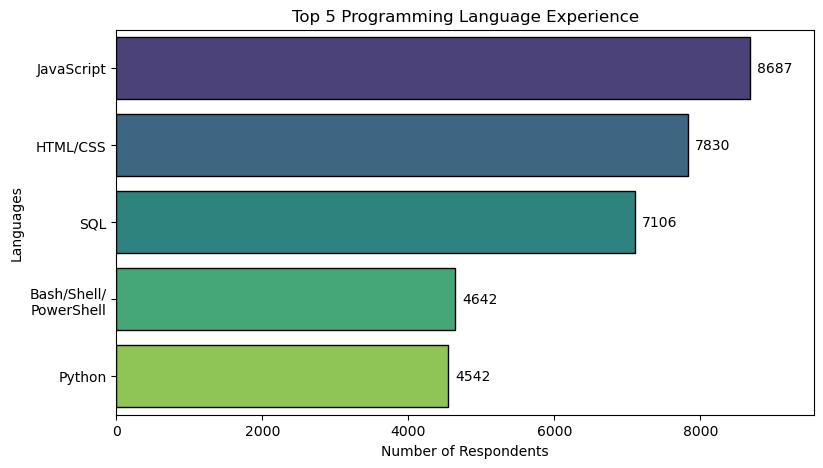

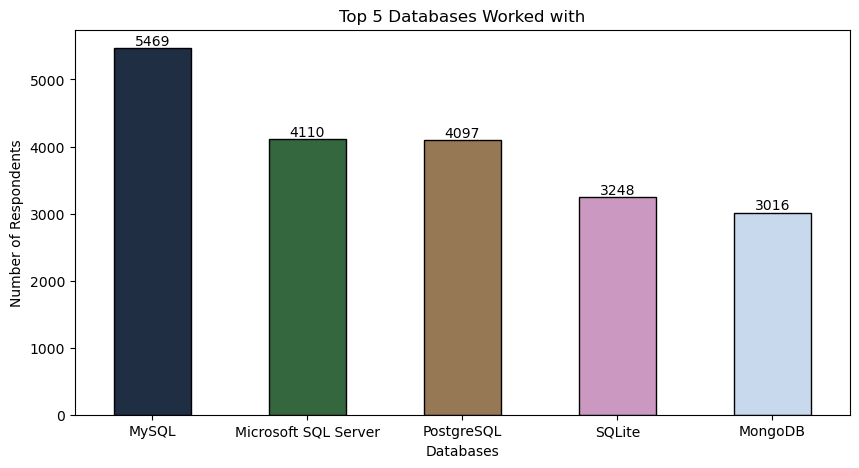

In [37]:
# Extracts the top 5 programming languages used
lang_counts = df['LanguageWorkedWith'].str.split(';').explode().value_counts().head(5)

# Creates a figure for the top 5 programming languages
plt.figure(figsize=(9, 5))  
ax1 = sns.barplot(x=lang_counts.values, y=lang_counts.index, hue=lang_counts.index, palette='viridis', legend=False, edgecolor='black') 
ax1.margins(x=0.1) 
for container in ax1.containers:
    ax1.bar_label(container, padding=5)
plt.xlabel('Number of Respondents')  
plt.ylabel('Languages') 
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=11)) for label in lang_counts.index]
ax1.set_yticks(range(len(wrapped_labels)))  
ax1.set_yticklabels(wrapped_labels)  
plt.title('Top 5 Programming Language Experience')  
plt.show();

# Extracts the top 5 databases used
db_counts = df['DatabaseWorkedWith'].str.split(';').explode().value_counts().head(5)

# Creates a figure for the top 5 databases
plt.figure(figsize=(10, 5)) 
ax2 = sns.barplot(x=db_counts.index, y=db_counts.values, hue=db_counts.index, palette='cubehelix', legend=False, width=0.5, edgecolor='black')  
for container in ax2.containers:
    ax2.bar_label(container)
plt.xlabel('Databases')  
plt.ylabel('Number of Respondents')  
plt.title('Top 5 Databases Worked with')
plt.show();


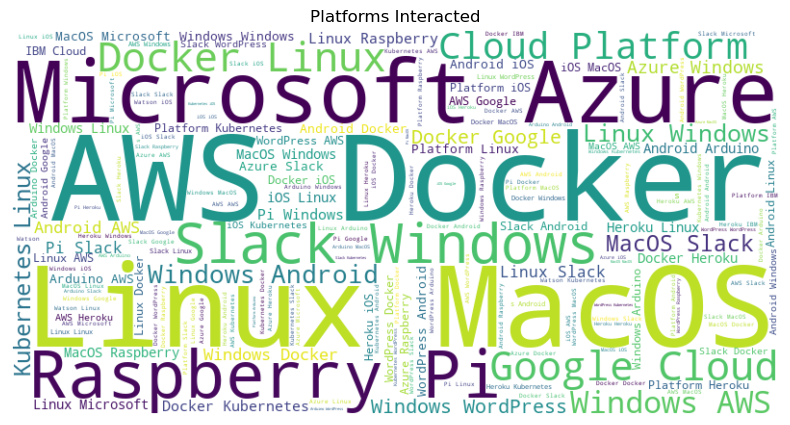

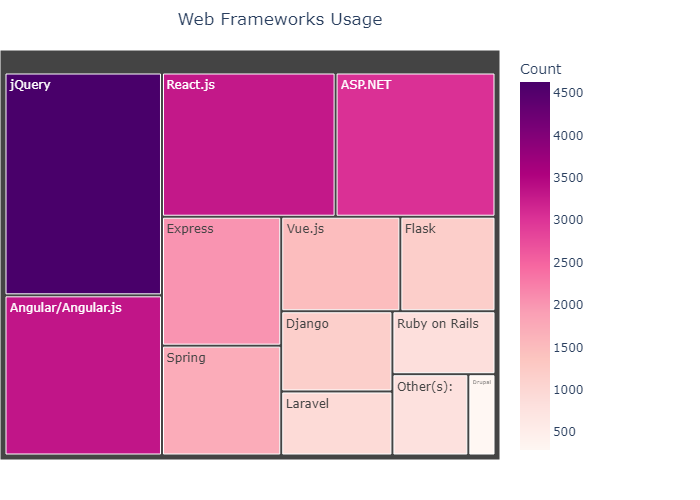

In [38]:
# Extracts the platforms interacted
platform_text = " ".join(df['PlatformWorkedWith'].dropna().str.replace(';', ' '))

# Creates a Word Cloud for the platforms interacted 
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(platform_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Platforms Interacted')
plt.show();

# Extracts the top webframes used
framework_counts = df['WebFrameWorkedWith'].str.split(';').explode().value_counts().reset_index()
framework_counts.columns = ['Framework', 'Count']

# Creates a Treemap for top webframes used
fig = px.treemap(framework_counts, path=['Framework'], values='Count', title="Web Frameworks Usage", color='Count', color_continuous_scale='RdPu')
fig.update_layout(
    margin=dict(l=0, r=200, t=50, b=40),  
    title_x=0.4,
    autosize=True
)
# fig.show()
fig.write_image("treemap.png")  # Save as an image
from IPython.display import display
from PIL import Image
display(Image.open("treemap.png")) #Plot is converted image to display in github 

#### Future Tech Trend

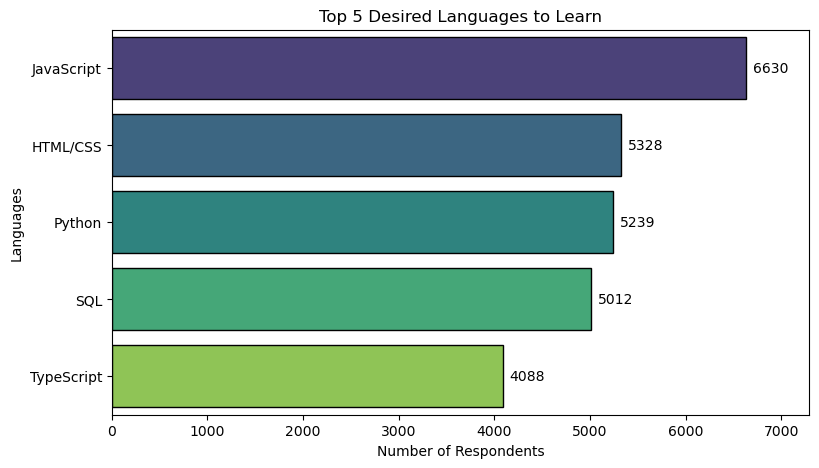

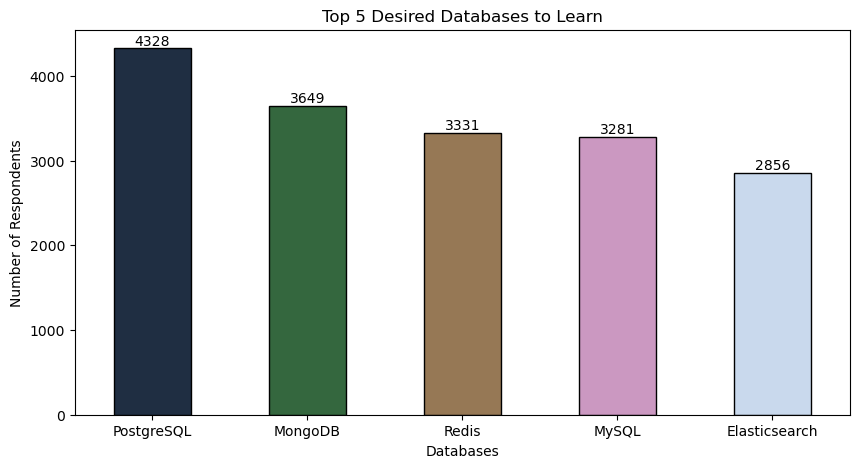

In [39]:
# Extracts the top 5 programming languages desired
lang_counts = df['LanguageDesireNextYear'].str.split(';').explode().value_counts().head(5)

# Creates a figure for the top 5 programming languages desired
plt.figure(figsize=(9, 5))  
ax1 = sns.barplot(x=lang_counts.values, y=lang_counts.index, hue=lang_counts.index, palette='viridis', legend=False, edgecolor='black') 
ax1.margins(x=0.1) 
for container in ax1.containers:
    ax1.bar_label(container, padding=5)
plt.xlabel('Number of Respondents')  
plt.ylabel('Languages') 
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=11)) for label in lang_counts.index]
ax1.set_yticks(range(len(wrapped_labels)))  
ax1.set_yticklabels(wrapped_labels)  
plt.title('Top 5 Desired Languages to Learn')  
plt.show();

# Extracts the top 5 databases desired
db_counts = df['DatabaseDesireNextYear'].str.split(';').explode().value_counts().head(5)

# Creates a figure for the top 5 databases desired
plt.figure(figsize=(10, 5)) 
ax2 = sns.barplot(x=db_counts.index, y=db_counts.values, hue=db_counts.index, palette='cubehelix', legend=False, width=0.5, edgecolor='black')  
for container in ax2.containers:
    ax2.bar_label(container)
plt.xlabel('Databases')  
plt.ylabel('Number of Respondents')  
plt.title('Top 5 Desired Databases to Learn') 
plt.show();


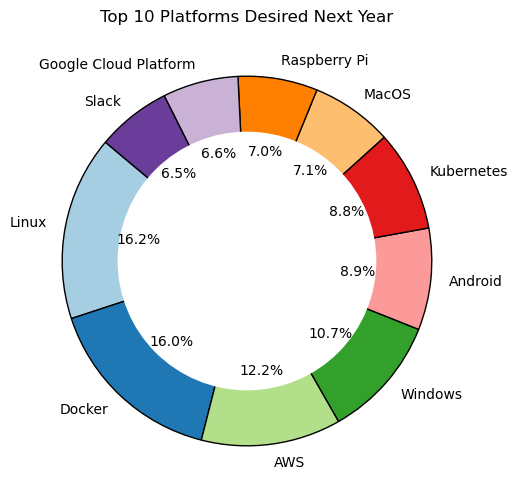

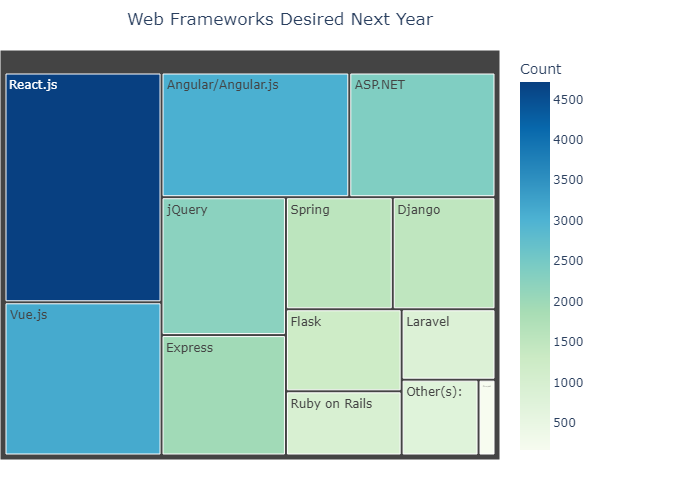

In [40]:
# # Extracts the top 10 platforms desired
platform_counts = df['PlatformDesireNextYear'].str.split(';').explode().value_counts().head(10) 

# Create Donut Chart
plt.figure(figsize=(6, 6))
colors = plt.cm.Paired.colors  # Use a nice color palette
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Create the "donut hole"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Top 10 Platforms Desired Next Year')
plt.show();

# Extracts the top webframes desired to use
framework_counts = df['WebFrameDesireNextYear'].str.split(';').explode().value_counts().reset_index()
framework_counts.columns = ['Framework', 'Count']

# Creates a Treemap for top 10 webframes used
fig = px.treemap(framework_counts, path=['Framework'], values='Count', title='Web Frameworks Desired Next Year', color='Count', color_continuous_scale='GnBu')
fig.update_layout(
    margin=dict(l=0, r=200, t=50, b=40),  
    title_x=0.4,
    autosize=True
)
# fig.show()
fig.write_image("treemap.png")  # Save as an image
from IPython.display import display
from PIL import Image
display(Image.open("treemap.png")) #Plot is converted image to display in github 